In [1]:
import sys
print(sys.path)

#sys.path.append("/home/ringoshin/anaconda3/envs/metis/lib/python3.6/site-packages/")
sys.path.append("/home/ringoshin/Projects/z - learning/0 - Kaplan/proj/03 prj 3/lib")
print(sys.path)

['/home/ringoshin/Projects/z - learning/0 - Kaplan/proj/03 prj 3', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python37.zip', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7/lib-dynload', '', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/IPython/extensions', '/home/ringoshin/.ipython']
['/home/ringoshin/Projects/z - learning/0 - Kaplan/proj/03 prj 3', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python37.zip', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7/lib-dynload', '', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages', '/home/ringoshin/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/IPython/extensions', '/home/ringoshin/.ipython', '/home/ringoshin/Projects/z - learning/0 - Kapla

In [2]:
from lib.ml_common import (Vanilla_ML_Run, Vanilla_ML_Predict, 
                           Vanilla_ML_Run_CV)
from lib.nn_common import (Image_CNN_VGG, Image_CNN_VGG_Train,
                           Image__CNN_From_InceptionV3,
                           Image_CNN_From_InceptionV3_Train, Image_NN_Predict,
                           Image_NN_Plt_Acc, Image_NN_Plt_Loss, 
                           Image_NN_Plt_Training, Image_NN_Plt_Validation)

Using TensorFlow backend.


In [12]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
import random
import gc

import pickle

In [4]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [5]:
# fix random seed for reproducibility
seed = 128
np.random.seed(seed)

In [6]:
amer_path = '../downloads/american/'
abyss_path = '../downloads/abyssinian/'
skinny_path = '../downloads/skinny/'
american_list = os.listdir('../downloads/american')
abyssinian_list = os.listdir('../downloads/abyssinian')
skinny_list = os.listdir('../downloads/skinny')

In [7]:
target_label = ['American', 'Abyssinian', 'Skinny']

nrows = 150
ncolumns = 150
channels = 3
batch_size =32
 
X_raw = []
y_raw = []

In [8]:
model = pickle.load(open('models/inceptionV3_tuned_top-150_v1_trained_model.pkl','rb'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
history = pickle.load(open('models/inceptionV3_tuned_top-150_v1_history.pkl','rb'))

In [10]:
X_test = np.loadtxt('models/inceptionV3_tuned_top-150_v1_x_test_data.csv')
y_test = np.loadtxt('models/inceptionV3_tuned_top-150_v1_y_test_data.csv')

In [11]:
results = {k: history.history[k][-1] for k in history.history.keys()}
print(results)

{'val_loss': 0.35913791599120687, 'val_categorical_accuracy': 0.8930481270672803, 'loss': 0.1224814677522296, 'categorical_accuracy': 0.9476190476190476}


In [14]:
clf_report_1, cf_matrix_1 = Image_NN_Predict(model,
                                             X_test.reshape((-1,150,150,3)), 
                                             y_test, 
                                             target_names=target_label,
                                             batch_size=32, 
                                             verbose=2)

>> Predicting on neural network
              precision    recall  f1-score   support

    American       0.81      0.97      0.89       104
  Abyssinian       0.97      0.83      0.89       111
      Skinny       1.00      0.93      0.96        58

    accuracy                           0.90       273
   macro avg       0.93      0.91      0.91       273
weighted avg       0.92      0.90      0.91       273

[[101   3   0]
 [ 19  92   0]
 [  4   0  54]]



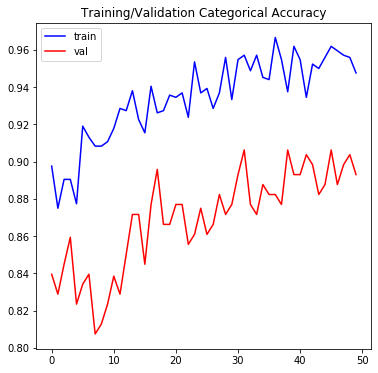

In [16]:
Image_NN_Plt_Acc(history)

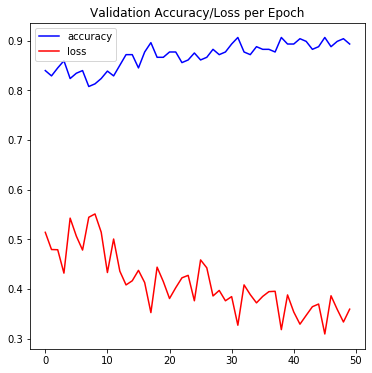

In [17]:
Image_NN_Plt_Validation(history)